# Certificate in Data Science | Assignment 6 |  
- Advertising Sales Regression

> University of Washington  
> September 2019  
> N. HICKS

## Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

***Please prepare this information for a client who may not understand what the parameters mean.***


## Import the Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
from sklearn import linear_model
import statsmodels.formula.api as sm

## Variables & Functions

In [2]:
%matplotlib inline
figArea = (15,7)   # width, height of the resulting plots
sns.set()

In [3]:
# retrieve the prescribed dataset
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path+file, index_col=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = 'C://Users//NateDogg//Desktop//_notebooks//'
        print('LOCAL FILE USED; REMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(path+file, index_col=0)
        
    # establish data types of the specified features
#     _df = set_Features(_df)
    
    # Derive log scales of the specified features: 'price'
#     _df = logFeature(_df, ['price'])
    
    return _df


# return a qGrid dataframe based on specified columns/features
def get_qGrid(df, features):
#     temp_df = pd.DataFrame(df[features[0]])
#     features.remove(features[0])
    temp_df = pd.DataFrame()
    for feature in features:
        temp_df = pd.concat([temp_df, df[feature]], axis=1)
    qGrid = qgrid.show_grid(temp_df)
    return qGrid


# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

## Import & View the Dataset

In [4]:
# Load data
file = 'Advertising.csv'
path = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/'
# import the file to a dataframe
ad_data = fetch_data(path, file)

print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

LOCAL FILE USED; REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)


      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# easily validate feature elements, that all are numeric
# use qGrid for easy feature filtering
colNames = ad_data.columns
ad_data_qGrid = get_qGrid(ad_data, colNames)
ad_data_qGrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Scale the Dataset

In [6]:
ad_data_scaled = pd.DataFrame(columns=['TV_scale', 'radio_scale', 'news_scale', 'sales_scale'])
ad_data_scaled['TV_scale'] = scale(ad_data['TV'])
ad_data_scaled['radio_scale'] = scale(ad_data['radio'])
ad_data_scaled['news_scale'] = scale(ad_data['newspaper'])
ad_data_scaled['sales_scale'] = scale(ad_data['sales'])
colNames = ad_data_scaled.columns
ad_dataScaled_qGrid = get_qGrid(ad_data_scaled, colNames)
ad_dataScaled_qGrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Linear Regression Model  
> Ordinary Least Squares for features:
> - TV
> - RADIO
> - NEWSPAPER

### Sci-Kit Learn package

In [7]:
# First initialize the model.
linear_model_TV = linear_model.LinearRegression()
linear_model_radio = linear_model.LinearRegression()
linear_model_newspaper = linear_model.LinearRegression()

n_points = ad_data.shape[0]

# re-shape the data
x_input_sales = ad_data_scaled['sales_scale'].values.reshape(n_points, 1)
y_output_TV = ad_data_scaled['TV_scale'].values.reshape(n_points, 1)
y_output_radio = ad_data_scaled['radio_scale'].values.reshape(n_points, 1)
y_output_newspaper = ad_data_scaled['news_scale'].values.reshape(n_points, 1)

# fit the linear regression models with the data
linear_model_TV.fit(x_input_sales, y_output_TV)
linear_model_radio.fit(x_input_sales, y_output_radio)
linear_model_newspaper.fit(x_input_sales, y_output_newspaper)

# Get predictions
y_pred_TV = linear_model_TV.predict(x_input_sales)
y_pred_radio = linear_model_radio.predict(x_input_sales)
y_pred_newspaper = linear_model_newspaper.predict(x_input_sales)

### StatsModel package

In [8]:
# establish the model object
# ols = ordinary least squares
ols_model_TV = sm.ols(formula = 'TV_scale ~ sales_scale', data=ad_data_scaled)
ols_model_radio = sm.ols(formula = 'radio_scale ~ sales_scale', data=ad_data_scaled)
ols_model_news = sm.ols(formula = 'news_scale ~ sales_scale', data=ad_data_scaled)

# fit the model
results_TV = ols_model_TV.fit()
results_radio = ols_model_radio.fit()
results_news = ols_model_news.fit()

# Get predictions
xColumn = ad_data_scaled['sales_scale']
yOLS_pred_TV = results_TV.predict(xColumn)
yOLS_pred_radio = results_radio.predict(xColumn)
yOLS_pred_news = results_news.predict(xColumn)

## Plot Results & Report Parameters


--- STATS MODEL ---
Intercept     0.00000
Slope         0.78222

--- SCI-KIT MODEL ---
Intercept     0.00000
Slope         0.78222


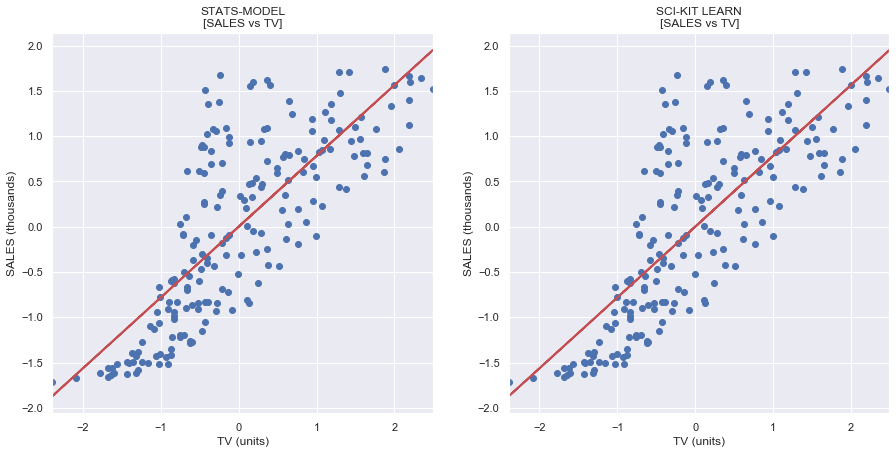


--- STATS MODEL ---
Intercept     -0.00000
Slope         0.57622

--- SCI-KIT MODEL ---
Intercept     -0.00000
Slope         0.57622


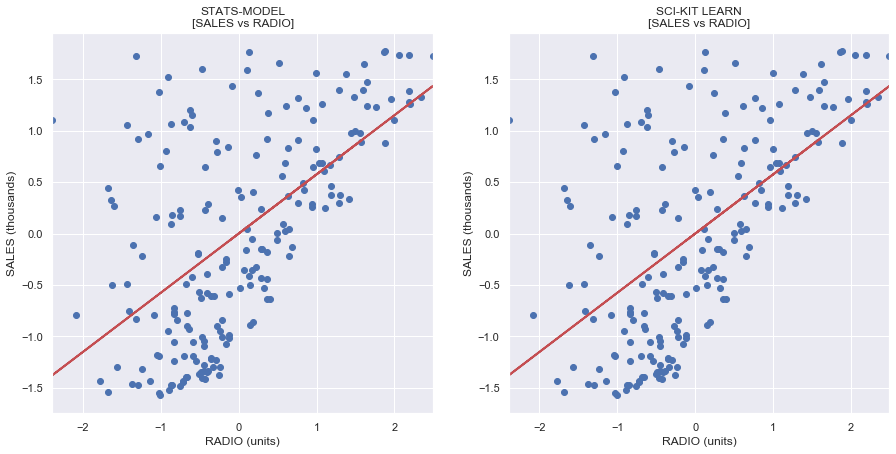


--- STATS MODEL ---
Intercept     0.00000
Slope         0.22830

--- SCI-KIT MODEL ---
Intercept     0.00000
Slope         0.22830


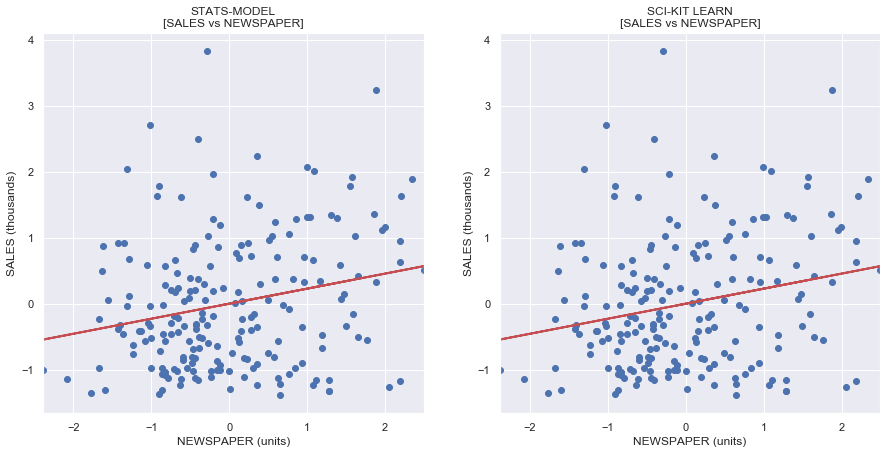

In [9]:
# Plot output - Sci-Kit Learn
y_outputs = [y_output_TV, y_output_radio, y_output_newspaper]
y_predictions = [y_pred_TV, y_pred_radio, y_pred_newspaper]
yOLS_predictions = [yOLS_pred_TV, yOLS_pred_radio, yOLS_pred_news]

i = 0
for y_output in y_outputs:
    # Print model parameters
    # Get slope (m) and y-intercept (b)
    if i==0:
        label = 'TV'
        print('\n--- STATS MODEL ---')
        print('Intercept     {0:.5f}'.format(results_TV.params[0]))
        print('Slope         {0:.5f}'.format(results_TV.params[1]))
        
        print('\n--- SCI-KIT MODEL ---')
        print('Intercept     {0:.5f}'.format(linear_model_TV.intercept_[0]))
        print('Slope         {0:.5f}'.format(linear_model_TV.coef_[0][0]))
    if i==1:
        label = 'RADIO'
        print('\n--- STATS MODEL ---')
        print('Intercept     {0:.5f}'.format(results_radio.params[0]))
        print('Slope         {0:.5f}'.format(results_radio.params[1]))
        
        print('\n--- SCI-KIT MODEL ---')
        print('Intercept     {0:.5f}'.format(linear_model_radio.intercept_[0]))
        print('Slope         {0:.5f}'.format(linear_model_radio.coef_[0][0]))
    if i==2:
        label = 'NEWSPAPER'
        print('\n--- STATS MODEL ---')
        print('Intercept     {0:.5f}'.format(results_news.params[0]))
        print('Slope         {0:.5f}'.format(results_news.params[1]))
        
        print('\n--- SCI-KIT MODEL ---')
        print('Intercept     {0:.5f}'.format(linear_model_newspaper.intercept_[0]))
        print('Slope         {0:.5f}'.format(linear_model_newspaper.coef_[0][0]))
    
    plt.figure(figsize=figArea)
    plt.subplot(1, 2, 1)
    plt.scatter(x_input_sales, y_output)
    plt.plot(x_input_sales, yOLS_predictions[i], color='r', linewidth=2)
    plt.xlim(min(x_input_sales),max(x_input_sales))
    plt.grid(True)
    plt.ylabel('SALES (thousands)')
    plt.xlabel(label + ' (units)')
    plt.title('STATS-MODEL\n[SALES vs ' + label + ']')
    
    plt.subplot(1, 2, 2)
    plt.scatter(x_input_sales, y_output)
    plt.plot(x_input_sales, y_predictions[i], color='r', linewidth=2)
    plt.xlim(min(x_input_sales),max(x_input_sales))
    plt.grid(True)
    plt.ylabel('SALES (thousands)')
    plt.xlabel(label + ' (units)')
    plt.title('SCI-KIT LEARN\n[SALES vs ' + label + ']')
    
    plt.show()
    i += 1

## Interpretation @ slope, intercept

> The following interpretations are assessed according to the plot and summary results (intercept b, slope m) shown above:
>  - ***INTERCEPT*** of the prediction line (shown in red): when x=0, then the intercept is the value of y.
>  - ***SLOPE*** of the prediction line (shown in red): when x increases by 1, then it is expected that yhe y value will increase by delta-y.
>  - Observe the following summary results for both the Stats-Model and the Sci-Kit Learn model:  
     - The slope and intercept results are identical for each of the models.  
     - The intercept value for each of the plots is zero, reasonably, as 0-dollars spent in any of the 3 medias results in 0-units of the specific media.
>  - SALES vs. TV:  
>    `b = 0.00000, m = 0.78222`  
>    - Due to the magnitude of the slope, sales revenue generated via TV is the most effective of the 3 scenarios.  
>    - The slope of the prediction line is positive.
>  - SALES vs. RADIO:  
>    `b = -0.00000, m = 0.57622`  
>    - The magnitude of the slope indicates that for increasing sales, radio generated revenue is a median strategy of the 3 medias.  
>    - The slope of the prediction line is positive, and slightly greater than a 45-degree angle to the horizontal. 
>  - SALES vs. NEWSPAPER:  
>    `b = 0.00000, m = 0.22830`  
>    - The magnitude of the slope indicates that for increasing sales, newspaper generated revenue is the least performant of the 3 media strategies.  
>    - The slope of the prediction line is positive, and less than either of the 2 previous plot results.

## Multiple Linear Regression Model  
> Ordinary Least Squares for all combined features:
> - TV
> - RADIO
> - NEWSPAPER

### StatsModel package  
> REF: https://datatofish.com/statsmodels-linear-regression/

In [10]:
# from statsmodels.api import add_constant
import statsmodels.api as sm
X = ad_data_scaled[['TV_scale', 'radio_scale', 'news_scale']]
y = ad_data_scaled['sales_scale']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_scale   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        10:15:58   Log-Likelihood:                -56.280
No. Observations:                 200   AIC:                             120.6
Df Residuals:                     196   BIC:                             133.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.857e-16      0.023  -2.12e-14      

C:\Users\NateDogg\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Interpretation @ partial slope, intercept  
> - The ***partial slope*** (COEF) of the multiple regression model concerning the advertising features 'TV', 'RADIO', and 'NEWS' are similar to those of the single regression models upon each feature individually.
> - Mainly, a comparison of the regression results shows that:
>                 | 'Single' | 'Multiple' |
>              TV |  0.7822  |   0.7531   |
>           RADIO |  0.5762  |   0.5365   |
>       NEWSPAPER |  0.2283  |  -0.0043   |
> - These results show the same ranking of outcomes as the single regression analysis, in that TV provides the largest impact to an advertising startegy, and that a NEWSPAPER strategy has the least return on investment. 

> - The ***intercept*** (STD ERR / STD COEF) of the multiple regression model concerning the advertising features 'TV', 'RADIO', and 'NEWS' are identified by the '***STD ERR***' column of the OLS summary.
> - Here, the multiple regression results remain similar to those of the single regreession results upon each feature individually.
> - Mainly, a comparison of these regression results for 'intercept' show that:
>                 | 'Single' | 'Multiple' |
>              TV |  0.000   |   0.023    |
>           RADIO |  0.000   |   0.025    |
>       NEWSPAPER |  0.000   |   0.025    |
> - These results reflect the initial determinations, that the intercepts of the 3 features are essentially 0 for when no sales are accomplished for a given product type.

## Interpratation @ adjusted R-squared  
> - The OLS summary above shows the adjusted r-squared value.
> - The adjusted R-squared value reflects the fit of the model to the underlying data, where a magnitude of 1 is an ideal fit.
> - Here, the model has an adjusted r-squared value of 0.896, that indicates a relatively good fit.

## Root Mean Squared Error (RMSE)  
> - The root mean square error is the square root of the Sum Square Explained.

In [11]:
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

RMSE: 7.733953875299716
